<a href="https://colab.research.google.com/github/Alankaar63/Data-Analysis-With-Python/blob/main/adani_power_stocksanalys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TATA ADANI RELIANCE Stock Data.zip to TATA ADANI RELIANCE Stock Data.zip


In [3]:
import os
import zipfile
with zipfile.ZipFile('TATA ADANI RELIANCE Stock Data.zip','r') as zip_ref:
  print(zip_ref.namelist())
  zip_ref.extract('Ril_Adani_Tata/Adani/ADANIPOWER.NS.csv')

['Ril_Adani_Tata/Adani/ADANIENT.NS.csv', 'Ril_Adani_Tata/Adani/ADANIGREEN.NS.csv', 'Ril_Adani_Tata/Adani/ADANIPORTS.NS.csv', 'Ril_Adani_Tata/Adani/ADANIPOWER.NS.csv', 'Ril_Adani_Tata/Adani/ADANITRANS.NS.csv', 'Ril_Adani_Tata/Adani/ATGL.NS.csv', 'Ril_Adani_Tata/Adani/AWL.NS.csv', 'Ril_Adani_Tata/RIL/DEN.NS.csv', 'Ril_Adani_Tata/RIL/HATHWAY.NS.csv', 'Ril_Adani_Tata/RIL/HATHWAYB.BO.csv', 'Ril_Adani_Tata/RIL/JUSTDIAL.NS.csv', 'Ril_Adani_Tata/RIL/NETWORK18.NS.csv', 'Ril_Adani_Tata/RIL/RELIANCE.NS.csv', 'Ril_Adani_Tata/RIL/RIIL.NS.csv', 'Ril_Adani_Tata/TATA/ASAL.NS.csv', 'Ril_Adani_Tata/TATA/INDHOTEL.NS.csv', 'Ril_Adani_Tata/TATA/NELCO.NS.csv', 'Ril_Adani_Tata/TATA/ORIENTHOT.NS.csv', 'Ril_Adani_Tata/TATA/RALLIS.NS.csv', 'Ril_Adani_Tata/TATA/TATACHEM.NS.csv', 'Ril_Adani_Tata/TATA/TATACOFFEE.NS.csv', 'Ril_Adani_Tata/TATA/TATACOMM.NS.csv', 'Ril_Adani_Tata/TATA/TATACONSUM.NS.csv', 'Ril_Adani_Tata/TATA/TATAELXSI.NS.csv', 'Ril_Adani_Tata/TATA/TATAINVEST.NS.csv', 'Ril_Adani_Tata/TATA/TATAMETALI.NS.

In [4]:
df = pd.read_csv('Ril_Adani_Tata/Adani/ADANIPOWER.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,99.250000,100.000000,98.599998,99.000000,99.000000,370563.0
1,2010-01-05,99.900002,112.900002,99.500000,105.050003,105.050003,8432683.0
2,2010-01-06,106.500000,110.800003,106.000000,107.449997,107.449997,6297126.0
3,2010-01-07,107.449997,108.199997,104.650002,104.949997,104.949997,1229154.0
4,2010-01-08,105.250000,107.000000,103.150002,103.699997,103.699997,1033660.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3268,2023-03-17,203.850006,205.300003,198.250000,199.949997,199.949997,11391354.0
3269,2023-03-20,193.000000,196.800003,189.949997,190.199997,190.199997,12119227.0
3270,2023-03-21,191.899994,199.699997,186.550003,199.699997,199.699997,12141316.0
3271,2023-03-22,203.149994,207.699997,201.149994,204.050003,204.050003,10063003.0
3272,2023-03-23,201.699997,211.399994,200.300003,201.399994,201.399994,14688196.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'])
df['moving_avg_7'] = df['Close'].rolling(window=7).mean()
df['moving_avg_30'] = df['Close'].rolling(window=30).mean()

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
3268   2023-03-17
3269   2023-03-20
3270   2023-03-21
3271   2023-03-22
3272   2023-03-23
Name: Date, Length: 3273, dtype: datetime64[ns]


In [8]:
#handling missing values
print(df.isnull().sum())

Date               0
Open               7
High               7
Low                7
Close              7
Adj Close          7
Volume             7
moving_avg_7      55
moving_avg_30    234
dtype: int64


In [9]:
col_miss_val = [col for col in df.columns if df[col].isnull().any()]
print(col_miss_val)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'moving_avg_7', 'moving_avg_30']


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_df = pd.DataFrame(imputer.fit_transform(df[col_miss_val]))

imputed_df.columns = df.drop(columns='Date',axis=1).columns

In [11]:
print(imputed_df.isnull().any())

Open             False
High             False
Low              False
Close            False
Adj Close        False
Volume           False
moving_avg_7     False
moving_avg_30    False
dtype: bool


In [12]:
X = imputed_df.drop(columns='Close',axis=1)
y = imputed_df['Close']

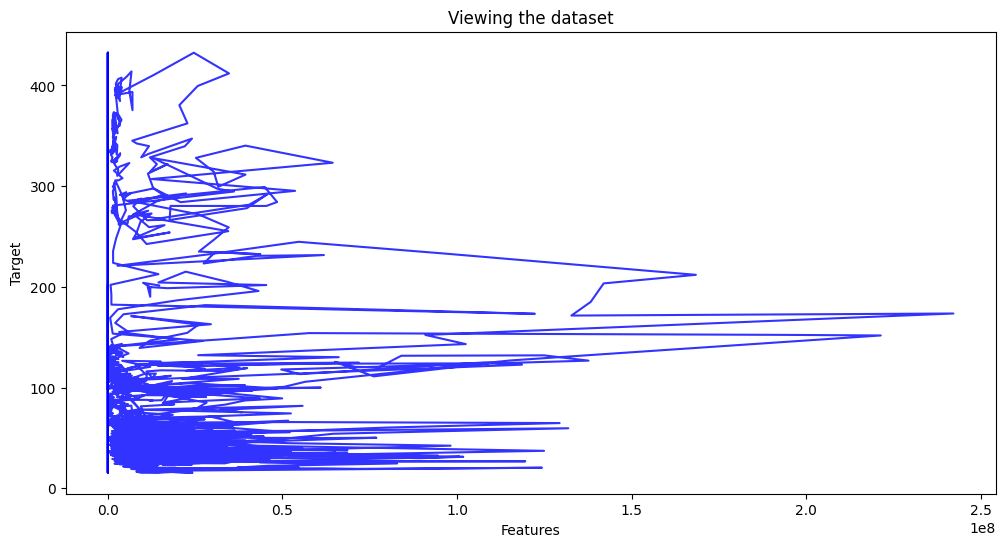

In [15]:
#viewing the dataset
plt.figure(figsize=(12,6))
plt.title('Viewing the dataset')
plt.xlabel('Features')
plt.ylabel('Target')
plt.plot(X,y,color='blue',alpha=0.8)
plt.show();

In [16]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_valid = scaler.transform(X_valid)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lr = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1,positive=False)

lr.fit(scaled_X_train,y_train)
preds = lr.predict(scaled_X_valid)
mse = mean_squared_error(y_valid,preds)
cv_score = cross_val_score(lr,scaled_X_valid,y_valid,cv=5,scoring='neg_mean_squared_error')
avg_cvscore = -cv_score.mean()
print("MSE:",mse)
print("CV score:",avg_cvscore)

MSE: 2.173334676871978e-27
CV score: 2.3182442098737984e-27


In [19]:
#checking for overfitting
print("First 10 predicted values\n",preds[:10],"\n")
print("First 10 actual values\n",y_valid[:10].values,"\n")

First 10 predicted values
 [ 28.549999  30.1       51.5       73.        36.650002 125.099998
  44.349998  30.25      51.150002 299.350006] 

First 10 actual values
 [ 28.549999  30.1       51.5       73.        36.650002 125.099998
  44.349998  30.25      51.150002 299.350006] 



In [20]:
train_preds = lr.predict(scaled_X_train)
train_mse = mean_squared_error(y_train,train_preds)
print("Train MSE:",train_mse)
print("Validation MSE:",mse)

Train MSE: 2.184106954613623e-27
Validation MSE: 2.173334676871978e-27


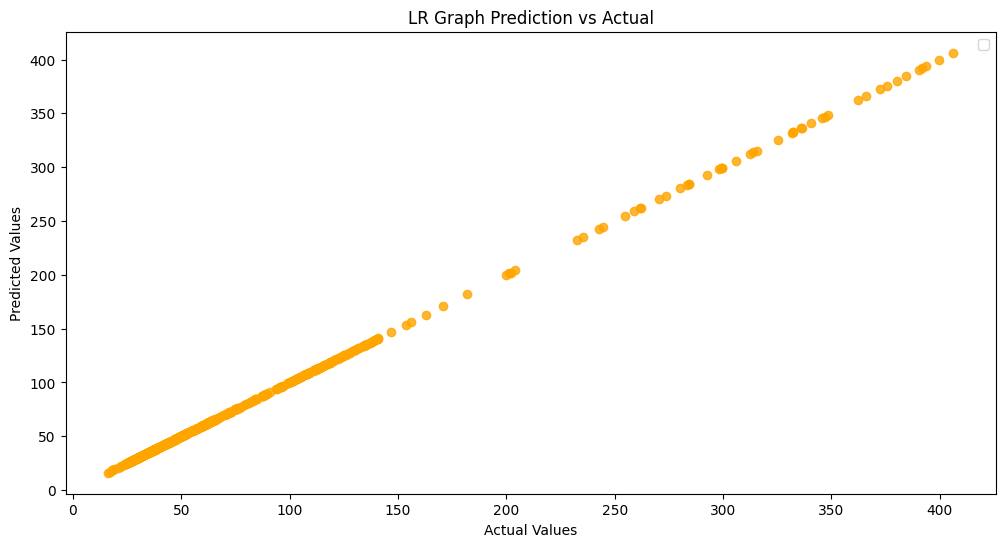

In [21]:
#visualising
plt.figure(figsize=(12,6))
plt.title('LR Graph Prediction vs Actual')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend(['Actual','Predicted'])
plt.scatter(y_valid,preds,color='orange',alpha=0.8)
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_estimators = [100,200,350]
criterion= ['squared_error','absolute_error']
max_depth = [20,40,60]
max_samples = [0.5,0.75,1.0]
bootstrap = [True]

In [ ]:
param_grid = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'max_samples':max_samples,
    'bootstrap':bootstrap
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [20, 40, 60],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [100, 200, 350]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': 60,
 'max_samples': 1.0,
 'n_estimators': 200}

In [ ]:
grid_search.best_score_

0.9998282477624928

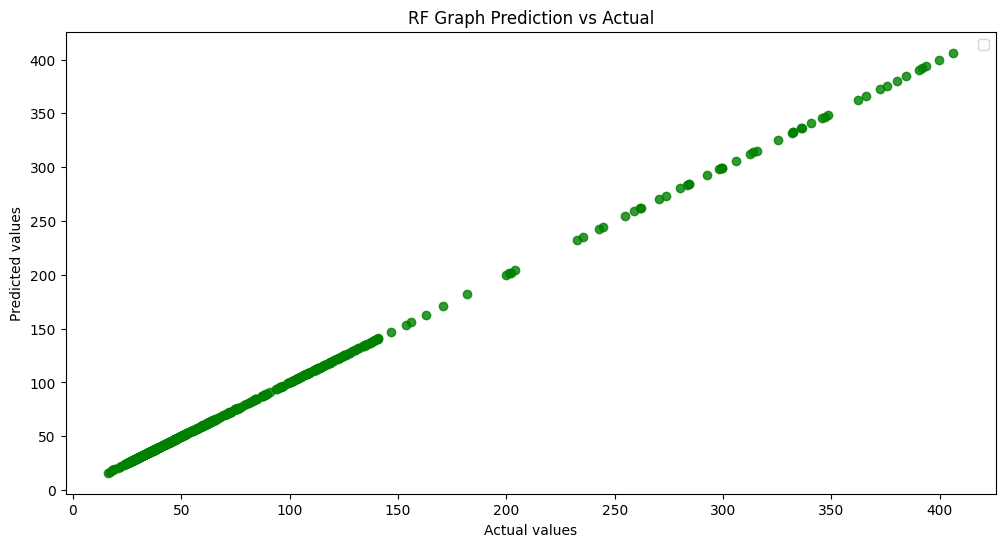

In [ ]:
plt.figure(figsize=(12,6))
plt.title('RF Graph Prediction vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(['Actual','Predicted'])
plt.scatter(y_valid,preds,color='green',alpha=0.8)
plt.show()

In [ ]:
n_estimators = [100,200,350]
criterion = ['squared_error','absolute_error']
max_depth=[20,40,60]
max_samples=[0.5,0.75,1.0]
bootstrap=[True]

In [ ]:
param_distributions = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'max_samples':max_samples,
    'bootstrap':bootstrap
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=param_distributions,cv=5,verbose=2,n_jobs=-1,n_iter=20)
random_search.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [20, 40, 60],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [100, 200, 350]},
                   verbose=2)

In [ ]:
random_search.best_params_

{'n_estimators': 350,
 'max_samples': 1.0,
 'max_depth': 20,
 'criterion': 'squared_error',
 'bootstrap': True}

In [ ]:
random_search.best_score_

0.9998342082935228